# Data Analysis

In [1]:
# Importing modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing data sets
df = pd.read_csv("cleaned_data.csv")


In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
df.columns # Name of all the columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

**To begin, import data set `cleaned_data.csv` and create lists of feature names for the remaining financial features: `'BILL_AMT1'`, `'BILL_AMT2'`, `'BILL_AMT3'`, `'BILL_AMT4'`, `'BILL_AMT5'`, `'BILL_AMT6'`,  `'PAY_AMT1'`, `'PAY_AMT2'`, `'PAY_AMT3'`, `'PAY_AMT4'`, `'PAY_AMT5'`, and `'PAY_AMT6'`.**

**Name the features `bill_feats` and `pay_amt_feats`, respectively.**

In [5]:
bill_feats=df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
pay_amt_feats=df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6']]

In [6]:
bill_feats.describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


# payment amount data which are exactly equal to 0

In [7]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6']].isin([0]).sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

In [8]:
# Getting all nonzero elements from 'PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6' and storing it into df
columns=['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
df = df.replace(0, np.nan).dropna(axis=0, how='any', subset=columns).replace(np.nan,0)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,university,0.0,0.0,0.0,1.0
9,62a2fd79-cd90,20000,1,3,2,35,-2.0,-2.0,-2.0,-2.0,...,0.0,13007.0,1122.0,0.0,0.0,high school,0.0,1.0,0.0,0.0
11,4777689a-5131,260000,2,1,2,51,-1.0,-1.0,-1.0,-1.0,...,8583.0,22301.0,0.0,3640.0,0.0,graduate school,1.0,0.0,0.0,0.0
17,cb258690-8ea2,360000,2,1,1,49,1.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,graduate school,1.0,0.0,0.0,0.0
18,f6f0307a-b75f,180000,2,1,2,29,1.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,graduate school,1.0,0.0,0.0,0.0


# Logarithmic Transformation and droping Nan Values

In [9]:

df['pay_1']=df['PAY_1'].apply(lambda x:np.log(x))
df['pay_2']=df['PAY_2'].apply(lambda x:np.log(x))
df['pay_3']=df['PAY_3'].apply(lambda x:np.log(x))
df['pay_4']=df['PAY_4'].apply(lambda x:np.log(x))
df['pay_5']=df['PAY_5'].apply(lambda x:np.log(x))
df['pay_6']=df['PAY_6'].apply(lambda x:np.log(x))
df.dropna(inplace=True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,graduate school,high school,others,university,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
57,b4abe25a-789d,50000,1,1,2,29,2.0,2.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
83,174c412f-2d17,200000,1,1,1,53,2.0,2.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
103,cc332450-5380,280000,1,2,1,41,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,1.0,0.693147,0.693147,0.693147,0.693147,0.693147,1.098612
111,46c75da5-bfd0,50000,1,3,2,37,2.0,2.0,2.0,3.0,...,0.0,1.0,0.0,0.0,0.693147,0.693147,0.693147,1.098612,0.693147,0.693147
145,9c0c1a78-0018,210000,1,3,1,45,2.0,3.0,4.0,4.0,...,0.0,1.0,0.0,0.0,0.693147,1.098612,1.386294,1.386294,1.609438,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,cd41e0dd-2b14,100000,1,2,2,44,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,1.0,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
26573,68a17b67-2553,70000,1,3,1,45,2.0,2.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
26641,8dea83fa-2f50,40000,1,2,2,47,2.0,2.0,3.0,2.0,...,0.0,0.0,0.0,1.0,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147
26655,46c706d6-6aef,210000,1,2,1,34,3.0,2.0,2.0,2.0,...,0.0,0.0,0.0,1.0,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147


# visualization

<AxesSubplot:xlabel='LIMIT_BAL'>

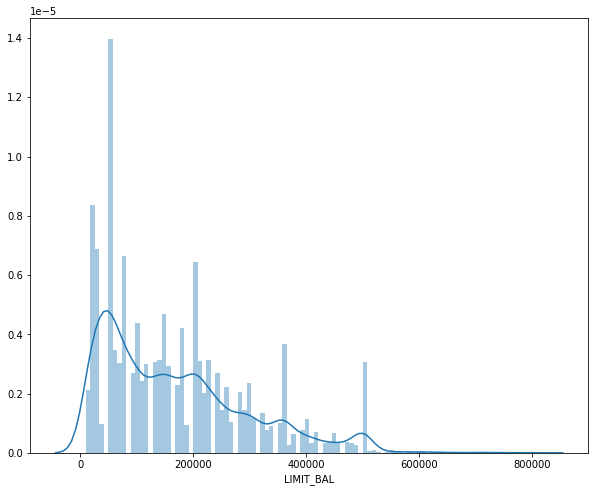

In [18]:
# distribution of PAY
plt.figure(figsize=(10,8))
sns.distplot(df['LIMIT_BAL'],bins=100)

# visualization of the PAY feature

<AxesSubplot:xlabel='pay_5'>

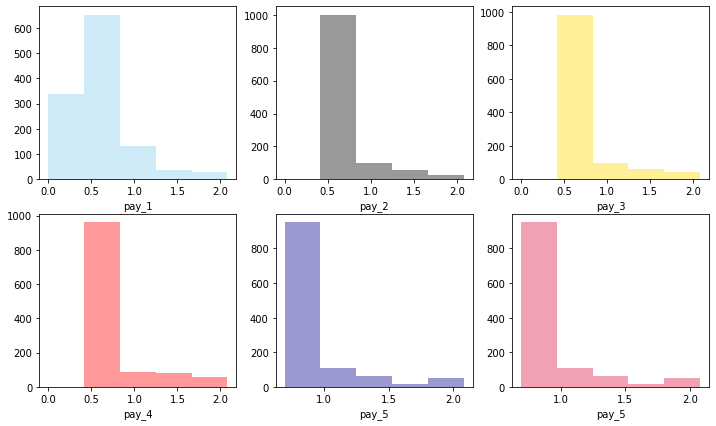

In [10]:

f, axes = plt.subplots(2, 3, figsize=(12, 7))
sns.distplot( df["pay_1"] , color="skyblue", ax=axes[0, 0],kde=False,bins=5)
sns.distplot( df["pay_2"] , color="black", ax=axes[0, 1],kde=False,bins=5)
sns.distplot( df["pay_3"] , color="gold", ax=axes[0, 2],kde=False,bins=5)
sns.distplot( df["pay_4"] , color="red", ax=axes[1, 0],kde=False,bins=5)
sns.distplot( df["pay_5"] , color="darkblue", ax=axes[1, 1],kde=False,bins=5)
sns.distplot( df["pay_5"] , color="crimson", ax=axes[1, 2],kde=False,bins=5)


# visualization of the bill amount features

<AxesSubplot:xlabel='BILL_AMT5'>

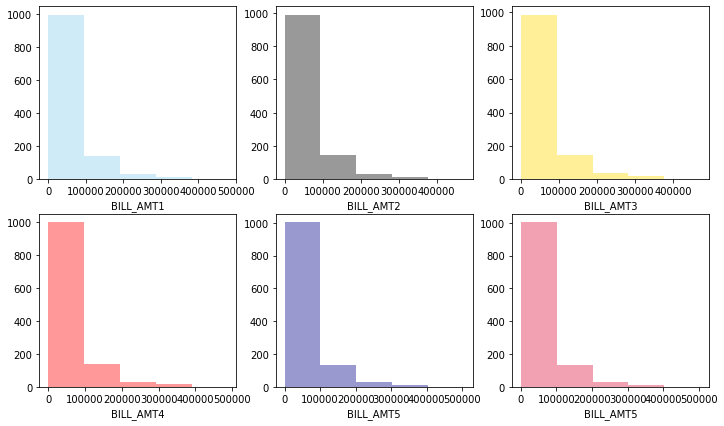

In [11]:

f, axes = plt.subplots(2, 3, figsize=(12, 7))
sns.distplot( df["BILL_AMT1"] , color="skyblue", ax=axes[0, 0],kde=False,bins=5)
sns.distplot( df["BILL_AMT2"] , color="black", ax=axes[0, 1],kde=False,bins=5)
sns.distplot( df["BILL_AMT3"] , color="gold", ax=axes[0, 2],kde=False,bins=5)
sns.distplot( df["BILL_AMT4"] , color="red", ax=axes[1, 0],kde=False,bins=5)
sns.distplot( df["BILL_AMT5"] , color="darkblue", ax=axes[1, 1],kde=False,bins=5)
sns.distplot( df["BILL_AMT5"] , color="crimson", ax=axes[1, 2],kde=False,bins=5)


# missiing value handelling

<AxesSubplot:>

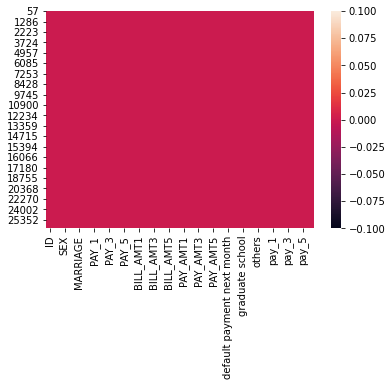

In [12]:
sns.heatmap(df.isnull())

In [13]:
# no missing value is there

# data engineering

In [14]:
# we do not need education_cat column
df.drop('EDUCATION_CAT',axis=1,inplace=True)

In [15]:
# dropping the ID column
df.drop("ID",axis=1,inplace=True)

In [16]:
#dropping EDUCATION column
df.drop('EDUCATION',axis=1, inplace=True)

In [17]:
df=df.rename(columns={"default payment next month":"Default"})

In [18]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default',
       'graduate school', 'high school', 'others', 'university', 'pay_1',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'],
      dtype='object')

# train test split

In [19]:
X=df.drop("Default",axis=1)
y=df["Default"]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
# scalling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
X_train = scaler.fit_transform(X_train)
#y_train=scaler.fit_transform(y_train)
X_test=scaler.transform(X_test)
#y_test=scaler.transform(y_test)

# logistic regression to train the model

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model  = LogisticRegression()

In [25]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
print(f'Model Accuracy:{model.score(X_test,y_test)*100:.2f}%')

Model Accuracy:69.21%


# prediction

In [27]:
y_preds = model.predict(X_test) #predicting value
y_probs = model.predict_proba(X_test) #predicitng probabilities
y_probs_positive = y_probs[:,1]
y_preds, y_probs, y_probs_positive

(array([1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        0., 

# Evaluating the model
## Area under Receiver Operating Charaterstic (ROC) Curve

In [28]:
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve
precision, recall, threshold = roc_curve(y_test, y_probs_positive)
precision, recall

(array([0.        , 0.        , 0.        , 0.00793651, 0.00793651,
        0.01587302, 0.01587302, 0.02380952, 0.02380952, 0.03174603,
        0.03174603, 0.03968254, 0.03968254, 0.04761905, 0.04761905,
        0.05555556, 0.05555556, 0.06349206, 0.06349206, 0.07142857,
        0.07142857, 0.07936508, 0.07936508, 0.08730159, 0.08730159,
        0.11111111, 0.11111111, 0.11904762, 0.11904762, 0.13492063,
        0.13492063, 0.14285714, 0.14285714, 0.18253968, 0.18253968,
        0.19047619, 0.19047619, 0.1984127 , 0.1984127 , 0.20634921,
        0.20634921, 0.21428571, 0.21428571, 0.22222222, 0.22222222,
        0.23015873, 0.23015873, 0.24603175, 0.24603175, 0.25396825,
        0.25396825, 0.26190476, 0.26190476, 0.26984127, 0.26984127,
        0.27777778, 0.27777778, 0.28571429, 0.28571429, 0.3015873 ,
        0.3015873 , 0.31746032, 0.31746032, 0.32539683, 0.32539683,
        0.34126984, 0.34126984, 0.35714286, 0.35714286, 0.37301587,
        0.37301587, 0.3968254 , 0.3968254 , 0.40

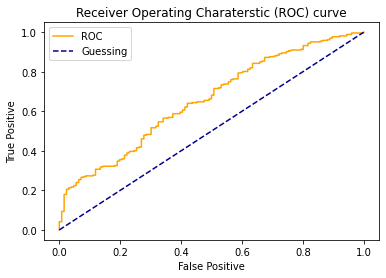

 Test ROC AUC Score percentage:65.58%


In [29]:
def plot_roc_curve(p,r,s):
    '''
    Plots ROC curve given the Precision and Recall of a Set.
    '''
    plt.plot(p,r,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Guessing') # Baseline
    plt.ylabel("True Positive")
    plt.xlabel("False Positive")
    plt.title("Receiver Operating Charaterstic (ROC) curve")
    plt.legend()
    plt.show()
    print(f" {s} ROC AUC Score percentage:{roc_auc_score(y_test,y_probs_positive)*100:.02f}%")
plot_roc_curve(precision,recall,"Test")

In [30]:
X_preds= model.predict(X_train) # Predicting values on train set
X_probs_positive = model.predict_proba(X_train)[:,1]

In [31]:
from sklearn.metrics import roc_curve,roc_auc_score
precision, recall, threshold = roc_curve(y_train, X_probs_positive)
precision, recall

(array([0.        , 0.        , 0.        , 0.00460829, 0.00460829,
        0.00921659, 0.00921659, 0.01382488, 0.01382488, 0.01843318,
        0.01843318, 0.02304147, 0.02304147, 0.02764977, 0.02764977,
        0.03225806, 0.03225806, 0.03686636, 0.03686636, 0.04147465,
        0.04147465, 0.04608295, 0.04608295, 0.05069124, 0.05069124,
        0.05529954, 0.05529954, 0.05990783, 0.05990783, 0.06451613,
        0.06451613, 0.06912442, 0.06912442, 0.07373272, 0.07373272,
        0.07834101, 0.07834101, 0.08294931, 0.08294931, 0.0875576 ,
        0.0875576 , 0.09677419, 0.09677419, 0.10138249, 0.10138249,
        0.10599078, 0.10599078, 0.11059908, 0.11059908, 0.11520737,
        0.11520737, 0.11981567, 0.11981567, 0.12442396, 0.12442396,
        0.12903226, 0.12903226, 0.13824885, 0.13824885, 0.14285714,
        0.14285714, 0.14746544, 0.14746544, 0.15207373, 0.15207373,
        0.15668203, 0.15668203, 0.16129032, 0.16129032, 0.16589862,
        0.16589862, 0.17050691, 0.17050691, 0.18

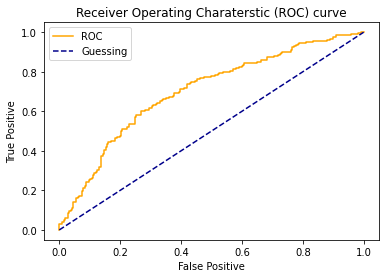

 Train ROC AUC Score percentage:65.58%


In [32]:
plot_roc_curve(precision,recall,"Train")

# There is no difference between Training and Test set ROC AUC Score
# Precision- Recall Curve

In [33]:
from sklearn.metrics import precision_recall_curve

In [34]:
precision,recall,thresholds=precision_recall_curve(y_test,y_probs_positive)

Text(0, 0.5, 'Precision')

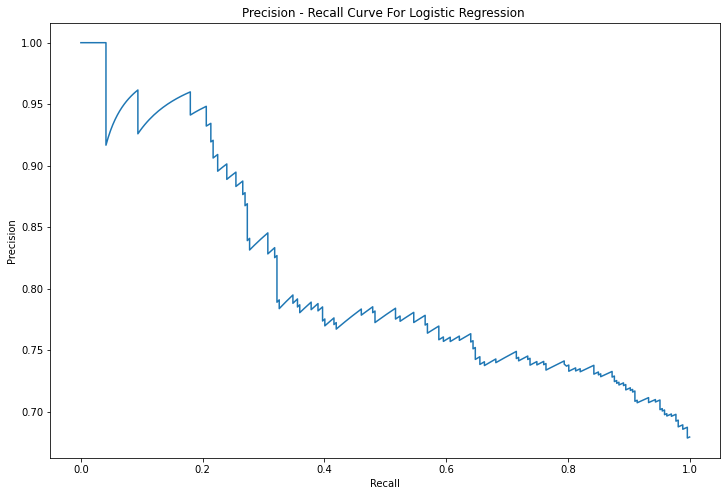

In [35]:
plt.figure(figsize=(12,8))
plt.title('Precision - Recall Curve For Logistic Regression ')
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

# Cross-Validation Grid Search with Random Forest


In [36]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

## Training and Cross Validation

In [37]:
from sklearn.ensemble import RandomForestClassifier


In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
model_params = {
    'n_estimators': [50, 150, 250],
    'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
    'min_samples_split': [2, 4, 6]
}

In [40]:
# create random forest classifier model
rf_model = RandomForestClassifier(n_estimators=300, random_state=0)

# set up grid search meta-estimator
clf = GridSearchCV(rf_model, model_params, cv=5)

# train the grid search meta-estimator to find the best model
model = clf.fit(X_train, y_train)

# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)

In [ ]:
print(all_accuracies)

In [ ]:
predictions = model.predict(X_test)
print(predictions)